<a href="https://colab.research.google.com/github/amritdp1989/Algo/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import yfinance as yf
ticker = yf.Ticker("NG=F")
news = ticker.news


In [39]:
# prompt: news has elements like 'title' and 'summary ' how to bring into a dataframe

import pandas as pd

df_news = pd.DataFrame(news)
df_news

,id,content
0,9b1e190c-de05-32bd-9f27-ad8de362b6d4,"{'id': '9b1e190c-de05-32bd-9f27-ad8de362b6d4',..."
1,fb643d13-20a5-3412-948f-c40e8a2b0d11,"{'id': 'fb643d13-20a5-3412-948f-c40e8a2b0d11',..."
2,cc2f407d-939e-341d-8808-d27ccb3d6804,"{'id': 'cc2f407d-939e-341d-8808-d27ccb3d6804',..."
3,d07c02ce-e6cc-3ff9-b9db-15363fa40562,"{'id': 'd07c02ce-e6cc-3ff9-b9db-15363fa40562',..."
4,42b18017-cfbd-4506-9217-3c8b1cd84a35,"{'id': '42b18017-cfbd-4506-9217-3c8b1cd84a35',..."
5,b6c76e41-12f8-3eee-95dd-9efb7c839304,"{'id': 'b6c76e41-12f8-3eee-95dd-9efb7c839304',..."
6,3d904f83-d8b8-30a1-9575-f19543b63734,"{'id': '3d904f83-d8b8-30a1-9575-f19543b63734',..."
7,38e2a8cb-c734-3b19-9f8f-e0ed57edc69e,"{'id': '38e2a8cb-c734-3b19-9f8f-e0ed57edc69e',..."
8,b8f1ffed-2323-3df3-ba85-51fc7527d9f9,"{'id': 'b8f1ffed-2323-3df3-ba85-51fc7527d9f9',..."
9,4c6f0121-f1eb-374b-a358-972380b07d27,"{'id': '4c6f0121-f1eb-374b-a358-972380b07d27',..."


No charts were generated by quickchart


In [42]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")
result = sentiment_analysis("Oil prices rise in 2025 as Trump prepares to boost industry")
print(result)  # [{'label': 'negative', 'score': 0.87}]


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use cpu


[{'label': 'NEU', 'score': 0.8208943605422974}]


In [13]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
text = "Apple stock falls drastically due to sanctions"
score = sia.polarity_scores(text)
print(score)  # Output: {'neg': 0.0, 'neu': 0.429, 'pos': 0.571, 'compound': 0.6369}


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
positive_words = 'bullish breakout support undervalued'
negative_words = 'bearish resistance overvalued sell'
dictOfpos = {i: 4 for i in positive_words.split()}
dictOfneg = {i: -4 for i in negative_words.split()}
sia.lexicon.update({**dictOfpos, **dictOfneg})


In [25]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
sentiment_pipeline("Apple stock perform positive")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9993220567703247}]

In [2]:
from finvader import finvader

text = "Apple's Q4 earnings beat estimates"
score = finvader(text, use_sentibignomics=True, use_henry=True, indicator='compound')
print(score)  # Output: -0.32 (Mildly Negative)


0.3612


NameError: name 'sentiment_scores' is not defined

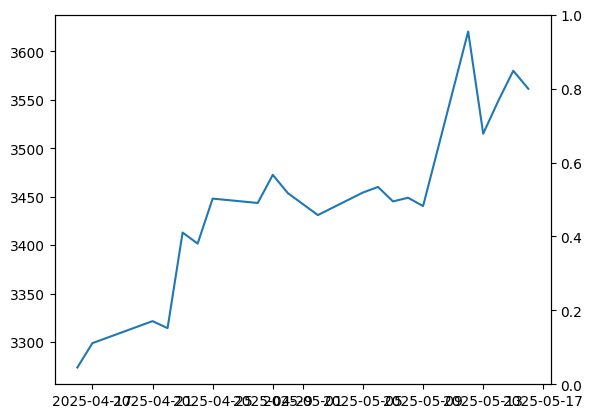

In [45]:
import yfinance as yf
import matplotlib.pyplot as plt

stock = yf.Ticker("TCS.NS")
prices = stock.history(period="1mo")
plt.plot(prices['Close'], label='TCS Price')
plt.twinx().plot(sentiment_scores, color='red', label='Sentiment')
plt.title('TCS Stock Price vs. News Sentiment (May 2024)')
plt.legend()


In [6]:
#!pip install finvader yfinance pandas matplotlib
import yfinance as yf
from finvader import finvader
import pandas as pd
import matplotlib.pyplot as plt
import re

In [7]:


# Configuration
TICKER = "TCS.NS"  # National Stock Exchange symbol
LOOKBACK_DAYS = 90  # Analyze past 3 months

# 1. Fetch News Data
stock = yf.Ticker(TICKER)
news = stock.news

# Convert to DataFrame
df_news = pd.DataFrame(news)[['title', 'publisher', 'link', 'providerPublishTime']]
df_news['date'] = pd.to_datetime(df_news['providerPublishTime'], unit='s')

# 2. Text Preprocessing
def clean_financial_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text).strip()   # Remove extra whitespace
    return text

df_news['cleaned_title'] = df_news['title'].apply(clean_financial_text)

# 3. Sentiment Analysis
def analyze_sentiment(text):
    # Using the finvader library for financial sentiment analysis
    vader_sentiment = finvader(text,
                              lexicon="vader",
                              use_sentibreak=False,
                              pos=False,
                              neg=False,
                              neu=False)
    return vader_sentiment['compound']

df_news['sentiment_score'] = df_news['cleaned_title'].apply(analyze_sentiment)

# 4. Analyze Sentiment Trends
# Filter news within the lookback period
end_date = pd.to_datetime('today')
start_date = end_date - pd.Timedelta(days=LOOKBACK_DAYS)

recent_news = df_news[(df_news['date'] >= start_date) & (df_news['date'] <= end_date)].copy()

# Calculate average sentiment per day
sentiment_over_time = recent_news.set_index('date')['sentiment_score'].resample('D').mean().fillna(0)

# 5. Visualize Sentiment Trends
plt.figure(figsize=(12, 6))
plt.plot(sentiment_over_time.index, sentiment_over_time.values)
plt.title(f'Average Sentiment of News Headlines for {TICKER} Over the Last {LOOKBACK_DAYS} Days')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()

# Optional: Analyze Top Positive and Negative Headlines
print("\nTop 5 Most Positive Headlines:")
print(recent_news.sort_values(by='sentiment_score', ascending=False).head()[['date', 'title', 'sentiment_score']])

print("\nTop 5 Most Negative Headlines:")
print(recent_news.sort_values(by='sentiment_score', ascending=True).head()[['date', 'title', 'sentiment_score']])

KeyError: "None of [Index(['title', 'publisher', 'link', 'providerPublishTime'], dtype='object')] are in the [columns]"

In [8]:
import pandas as pd
import yfinance as yf
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from finvader import finvader
import time

Analyzing sentiment for NG=F...


[*********************100%***********************]  1 of 1 completed


Sentiment Analysis Results for NG=F:
Overall Sentiment Score: 0.0000
Overall Sentiment: Neutral

Sentiment Distribution:
Neutral: 10 articles (100.0%)


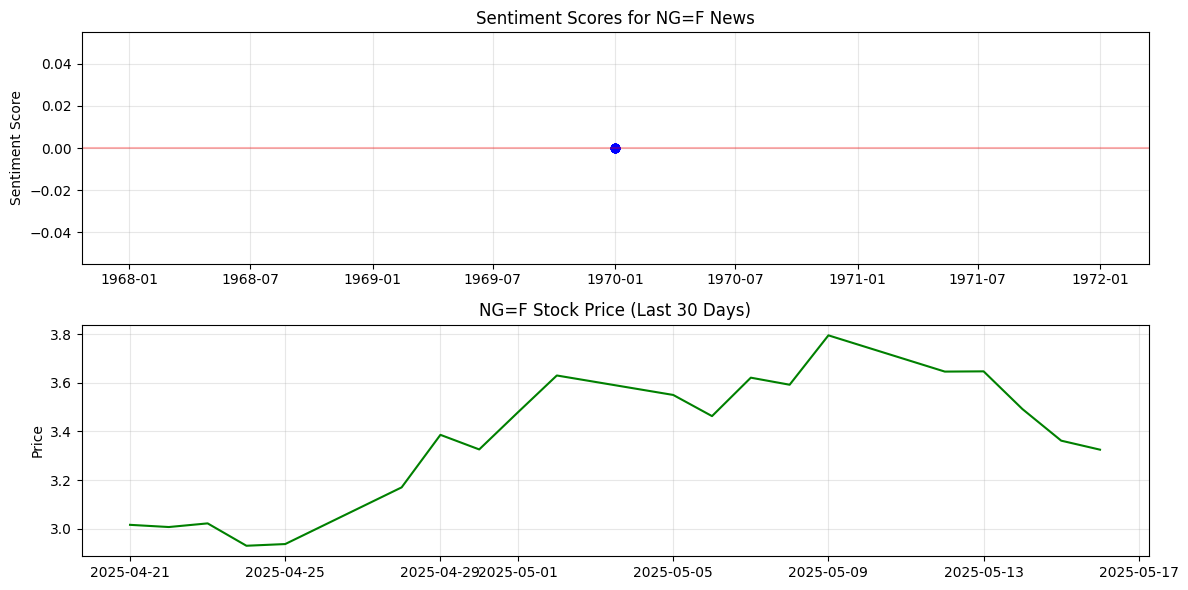


Detailed News Sentiment:
Date: 1970-01-01
Title: 
Sentiment: Neutral (0.0000)
--------------------------------------------------------------------------------
Date: 1970-01-01
Title: 
Sentiment: Neutral (0.0000)
--------------------------------------------------------------------------------
Date: 1970-01-01
Title: 
Sentiment: Neutral (0.0000)
--------------------------------------------------------------------------------
Date: 1970-01-01
Title: 
Sentiment: Neutral (0.0000)
--------------------------------------------------------------------------------
Date: 1970-01-01
Title: 
Sentiment: Neutral (0.0000)
--------------------------------------------------------------------------------
Date: 1970-01-01
Title: 
Sentiment: Neutral (0.0000)
--------------------------------------------------------------------------------
Date: 1970-01-01
Title: 
Sentiment: Neutral (0.0000)
--------------------------------------------------------------------------------
Date: 1970-01-01
Title: 
Sentiment: 

In [13]:
# Function to get news for a stock using Yahoo Finance
def get_stock_news(ticker_symbol, max_news=10):
    try:
        ticker = yf.Ticker(ticker_symbol)
        news = ticker.news
        return news[:max_news]
    except Exception as e:
        print(f"Error fetching news for {ticker_symbol}: {e}")
        return []

# Function to clean and prepare text for sentiment analysis
def clean_text(text):
    # Basic cleaning - you can expand this as needed
    if not text:
        return ""
    return text.replace('\n', ' ').strip()

# Function to analyze sentiment using FinVADER
def analyze_sentiment(text):
    if not text:
        return 0

    # Use both financial lexicons for better accuracy
    sentiment_score = finvader(
        text,
        use_sentibignomics=True,
        use_henry=True,
        indicator='compound'
    )

    return sentiment_score

# Function to categorize sentiment scores
def categorize_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Main function to analyze stock sentiment
def analyze_stock_sentiment(ticker_symbol, plot_results=True):
    print(f"Analyzing sentiment for {ticker_symbol}...")

    # Get news data
    news_data = get_stock_news(ticker_symbol)

    if not news_data:
        print("No news found for this ticker.")
        return None

    # Create a DataFrame to store results
    results = []

    for item in news_data:
        # Extract title and full text if available
        title = clean_text(item.get('title', ''))

        # Some news items might have a 'description' field
        description = clean_text(item.get('description', ''))

        # Combine title and description for better context
        full_text = f"{title}. {description}" if description else title

        # Get publication date
        pub_date = datetime.fromtimestamp(item.get('providerPublishTime', 0))

        # Analyze sentiment
        sentiment_score = analyze_sentiment(full_text)
        sentiment_category = categorize_sentiment(sentiment_score)

        # Store results
        results.append({
            'date': pub_date,
            'title': title,
            'sentiment_score': sentiment_score,
            'sentiment_category': sentiment_category
        })

    # Convert to DataFrame
    df_results = pd.DataFrame(results)

    # Calculate overall sentiment
    overall_sentiment = df_results['sentiment_score'].mean()
    overall_category = categorize_sentiment(overall_sentiment)

    print(f"\nSentiment Analysis Results for {ticker_symbol}:")
    print(f"Overall Sentiment Score: {overall_sentiment:.4f}")
    print(f"Overall Sentiment: {overall_category}")

    # Count sentiment categories
    sentiment_counts = df_results['sentiment_category'].value_counts()
    print("\nSentiment Distribution:")
    for category, count in sentiment_counts.items():
        print(f"{category}: {count} articles ({count/len(df_results)*100:.1f}%)")

    # Plot results if requested
    if plot_results and not df_results.empty:
        # Sort by date
        df_results = df_results.sort_values('date')

        # Plot sentiment over time
        plt.figure(figsize=(12, 6))

        # Plot sentiment scores
        plt.subplot(2, 1, 1)
        plt.plot(df_results['date'], df_results['sentiment_score'], 'o-', color='blue')
        plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
        plt.title(f'Sentiment Scores for {ticker_symbol} News')
        plt.ylabel('Sentiment Score')
        plt.grid(True, alpha=0.3)

        # Plot stock price for comparison (last 30 days)
        plt.subplot(2, 1, 2)
        end_date = datetime.now()
        start_date = end_date - timedelta(days=30)

        stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
        if not stock_data.empty:
            plt.plot(stock_data.index, stock_data['Close'], color='green')
            plt.title(f'{ticker_symbol} Stock Price (Last 30 Days)')
            plt.ylabel('Price')
            plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return df_results

# Example usage
if __name__ == "__main__":
    # Analyze sentiment for a stock (e.g., Apple)
    ticker = "NG=F"  # Change to your desired stock ticker

    # For Indian stocks, use .NS suffix (e.g., "RELIANCE.NS" for Reliance Industries)
    # ticker = "RELIANCE.NS"

    results_df = analyze_stock_sentiment(ticker, plot_results=True)

    # Display detailed results
    if results_df is not None:
        print("\nDetailed News Sentiment:")
        for _, row in results_df.iterrows():
            print(f"Date: {row['date'].strftime('%Y-%m-%d')}")
            print(f"Title: {row['title']}")
            print(f"Sentiment: {row['sentiment_category']} ({row['sentiment_score']:.4f})")
            print("-" * 80)

In [14]:
def track_sentiment_trends(ticker_symbol, days=30):
    """Track sentiment trends for a stock over time and compare with price movements"""

    end_date = datetime.now()
    start_date = end_date - timedelta(days=days)

    # Get stock price data
    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

    # Initialize sentiment tracking
    daily_sentiment = {}

    # For a real implementation, you would need a historical news API
    # This is a simplified example using current news and backfilling

    news_data = get_stock_news(ticker_symbol, max_news=50)

    for item in news_data:
        pub_date = datetime.fromtimestamp(item.get('providerPublishTime', 0))
        if start_date <= pub_date <= end_date:
            date_str = pub_date.strftime('%Y-%m-%d')

            title = clean_text(item.get('title', ''))
            description = clean_text(item.get('description', ''))
            full_text = f"{title}. {description}" if description else title

            sentiment_score = analyze_sentiment(full_text)

            if date_str in daily_sentiment:
                daily_sentiment[date_str].append(sentiment_score)
            else:
                daily_sentiment[date_str] = [sentiment_score]

    # Calculate average daily sentiment
    avg_sentiment = {date: sum(scores)/len(scores) for date, scores in daily_sentiment.items()}

    # Convert to DataFrame for easier plotting
    sentiment_df = pd.DataFrame(list(avg_sentiment.items()), columns=['Date', 'Sentiment'])
    sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
    sentiment_df = sentiment_df.sort_values('Date')

    # Plot results
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot stock price
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='tab:blue')
    ax1.plot(stock_data.index, stock_data['Close'], color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Plot sentiment on secondary y-axis
    ax2 = ax1.twinx()
    ax2.set_ylabel('Sentiment Score', color='tab:red')
    ax2.plot(sentiment_df['Date'], sentiment_df['Sentiment'], 'o-', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

    plt.title(f'{ticker_symbol} Stock Price vs News Sentiment')
    fig.tight_layout()
    plt.show()

    # Calculate correlation between sentiment and price changes
    if not sentiment_df.empty and len(sentiment_df) > 1:
        # Merge data
        sentiment_df.set_index('Date', inplace=True)
        merged_data = pd.merge(stock_data['Close'], sentiment_df,
                              left_index=True, right_index=True, how='inner')

        if len(merged_data) > 1:
            # Calculate daily returns
            merged_data['Returns'] = merged_data['Close'].pct_change()

            # Calculate correlation
            correlation = merged_data['Returns'].corr(merged_data['Sentiment'])
            print(f"\nCorrelation between sentiment and next-day returns: {correlation:.4f}")

            # Simple predictive insight
            latest_sentiment = sentiment_df['Sentiment'].iloc[-1] if not sentiment_df.empty else 0

            print("\nPredictive Insight:")
            if latest_sentiment > 0.2:
                print(f"Strong positive sentiment ({latest_sentiment:.4f}): Bullish signal")
            elif latest_sentiment > 0.05:
                print(f"Positive sentiment ({latest_sentiment:.4f}): Mildly bullish signal")
            elif latest_sentiment < -0.2:
                print(f"Strong negative sentiment ({latest_sentiment:.4f}): Bearish signal")
            elif latest_sentiment < -0.05:
                print(f"Negative sentiment ({latest_sentiment:.4f}): Mildly bearish signal")
            else:
                print(f"Neutral sentiment ({latest_sentiment:.4f}): No clear signal")
